In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [4]:
#2d Octagonal
def g(c, s, x):
    r = np.array([[c, s], [-s, c]])
    return x @ r
def h(c, s, x):
    r = np.array([[c, s], [-s, c]])
    p = 1/8*np.sum([multivariate_normal.pdf(x, [np.cos(i*np.pi/4), np.sin(i*np.pi/4)], 0.01*np.identity(2)) for i in np.arange(8)])
    q = 1/8*np.sum([multivariate_normal.pdf(x, [np.cos(i*np.pi/4), np.sin(i*np.pi/4)]@r, 0.01*r.T @ r) for i in np.arange(8)])
    return p/(p+q)

def generate_real_samples(n):
	amounts = np.random.multinomial(n,np.ones(8)/8.)
	X1 = []
	X2 = []
	mycounter = 0
	for i in np.arange(8):
		X1 = np.concatenate([X1,np.random.normal(np.cos(2*i*np.pi/8),0.1,amounts[mycounter])])
		X2 = np.concatenate([X2,np.random.normal(np.sin(2*i*np.pi/8),0.1,amounts[mycounter])])
		mycounter+=1
		pass

	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)    
	X = np.hstack((X1, X2))
	np.random.shuffle(X)
	return X

In [5]:
N = 10**3
xx = generate_real_samples(N)
C = 0
S = 0
range = 1.5
clow = C-range
chigh = C+range
step = 50
slow = S - range
shigh = S + range
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = np.array(g(c, s, xx))
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

mylosses -= np.max(mylosses)

In [2]:
c_i =  [3.8922424, -4.6685886, 3.4011345, -2.6853073, -3.2894719, -4.74842, -1.7845559, 4.2130775, 2.2997532, -2.110101, 0.6407652, 1.1692343, 1.2491264, -3.1669843, -1.9637525, 3.558115, 2.3259554, -1.0451496, -3.2606816, 0.28290844]
s_i =  [-1.3769114, -0.95684147, -4.180672, -2.378403, 1.2151074, -1.3638377, 0.5467081, 1.3085651, 0.92595005, 1.5514755, -0.5319824, -4.564824, -2.9842186, 0.106476784, 4.6859245, -0.6682873, -0.34714127, -1.0479844, 4.1599836, -4.65125]
c_f =  [0.71073705, -0.7061468, -0.0015911062, -0.7044826, -0.6996328, -0.7032111, -1.0153925, 0.70862234, 1.0040882, -0.7045064, 0.6842553, -0.7065153, -0.00057678646, -0.70940393, -0.0020791783, 0.70973545, 0.7086735, -0.70886236, 0.0007105303, 0.7104574]
s_f =  [0.7114658, 0.705778, -1.0007259, -0.7064994, -0.7043203, 0.7104056, 0.001082259, 0.71040106, 0.0036635285, 0.702053, -0.66795397, -0.7078888, -0.9953118, -0.7167913, 0.9963677, 0.7111285, -0.7139151, -0.7103283, 0.99577487, -0.7048467]

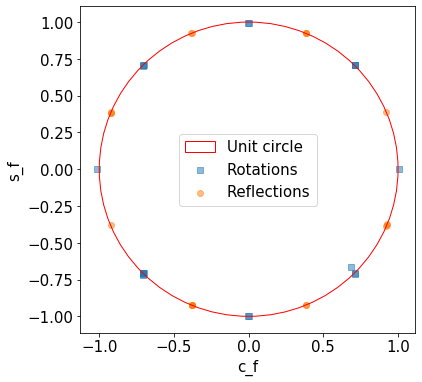

In [4]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(c_f, s_f, alpha=0.5, label="Rotations", marker='s')
plt.scatter(np.cos(np.arctan2(s_f, c_f) + np.pi/8), np.sin(np.arctan2(s_f, c_f) + np.pi/8), alpha = 0.5, label="Reflections")
plt.xlabel("c_f")
plt.ylabel("s_f")
circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None', label="Unit circle")
ax.add_patch(circ)
ax.legend()
#plt.show()
plt.savefig("2d_circsymm.pdf", bbox_inches='tight')

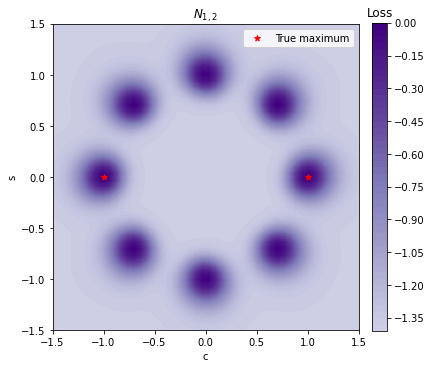

In [6]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,50, cmap='Purples', vmin=-2)
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

#ax.scatter(c_f, s_f, label = "Learned values", color='y')
plt.scatter([1, -1], [0, 0], marker='*', c='r', label = "True maximum")
plt.legend()
plt.title("$N_{1, 2}$")



#plt.savefig("4O2asymmAnalytic.pdf", bbox_inches='tight')
plt.show()